In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt  
import numpy as np
from tqdm import tqdm
from matplotlib.pyplot import figure

In [2]:
def drop_indexies(data):
    data.index = np.arange(len(data))
    
def get_year(row):
    return str(row.year)

def get_month(row):
    return str(row.month)

def get_season(row):
    if row.month in [12, 1, 2]:
        return '1-winter'
    if row.month in [3, 4, 5]:
        return '2-spring'
    if row.month in [6, 7, 8]:
        return '3-summer'
    if row.month in [9, 10, 11]:
        return '4-autumn'
    
def get_field(data):
    for i in data.index:
        fields_list = data['field'][i]
        for field in fields_list:
            data[field][i] = 1

In [3]:
fields = {0 : 'Математика',
         1 : 'Биоинформатика',
         2 : 'Железо, электроника',
         3 : 'Сетевые технологии, администрирование, devops',
         4 : 'Проектирование, тестирование',
         5 : 'Информационная безопасность',
         6 : 'Маркетинг, контекстная реклама',
         7 : 'Верстка, html, javascript',
         8 : 'Машинное обучение',
         9 : 'E-commerce, финансы',
         10 : 'Дизайн интерфейсов',
         11 : 'Бизнес, CRM',
         12 : 'SEO'}

In [4]:
habr = pd.read_json('/Users/alexandrasorokovikova/Data Science/НИР Сравнение IT/Comparison-of-IT-trends/data/final_data/habr_final.json')
habr['time'] = pd.to_datetime(habr['time'], format='%Y.%m.%d')
habr = habr.sort_values(by='time')
habr['year'] = habr['time'].apply(get_year)
habr['month'] = habr['time'].apply(get_month)
habr['season'] = habr['time'].apply(get_season)
habr['year-season'] = habr['year'] + '-' + habr['season']
habr = habr[habr['year'] >= '2016']
habr.head()


,time,tags,habs,saved,comments,views,field,year,month,season,year-season
10218,2016-01-01 18:14:50+00:00,"[сьерра-леоне, эбола, open source]","[open, source]",9,6,11551,"[Проектирование, тестирование]",2016,1,1-winter,2016-1-winter
10294,2016-01-07 12:20:20+00:00,"[бгуир, кафедра эвм, вмсис, arduino]","[разработка, arduino]",59,7,23050,"[Железо, электроника, Верстка, html, javascript]",2016,1,1-winter,2016-1-winter
10088,2016-01-07 20:29:38+00:00,"[https, tls, ssl, пароли]","[информационный, безопасность]",15,3,6055,[Информационная безопасность],2016,1,1-winter,2016-1-winter
9964,2016-01-09 10:08:37+00:00,"[1c, linux]","[настройка_linux, linux]",67,21,51822,"[Сетевые технологии, администрирование, devops...",2016,1,1-winter,2016-1-winter
10087,2016-01-20 20:29:22+00:00,"[хиллари клинтон, политика, почтовый сервер]","[информационный, безопасность]",2,2,6161,[Информационная безопасность],2016,1,1-winter,2016-1-winter


In [5]:
def stat_df(data, fields_columns, stat_columns):
    df = pd.DataFrame(columns = ['year-season', 'field'] + stat_columns)
    for i in tqdm(data.index):
        for field in data['field'][i]:
            df.loc[len(df)] = [data['year-season'][i], field, data['saved'][i], data['comments'][i], data['views'][i]]
    return df

habr_stat = stat_df(habr, list(fields.values())[2:], ['saved', 'comments', 'views'])
habr_stat.head()

100%|██████████| 36192/36192 [05:31<00:00, 109.27it/s]


,year-season,field,saved,comments,views
0,2016-1-winter,"Проектирование, тестирование",9,6,11551
1,2016-1-winter,"Железо, электроника",59,7,23050
2,2016-1-winter,"Верстка, html, javascript",59,7,23050
3,2016-1-winter,Информационная безопасность,15,3,6055
4,2016-1-winter,"Сетевые технологии, администрирование, devops",67,21,51822


In [6]:
def pivot_df(data, columns, values, func):
    df = pd.pivot_table(data, index = ['year-season'], columns = columns, values = values, aggfunc = func)
    df.columns = list(fields.values())[2:]
    df = df.fillna(0)

    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
    return df

In [7]:
def count_df(data):
    df = pd.DataFrame(index = list(data['year-season'].unique()), columns = list(fields.values())[2:])
    for i in df.index:
        for column in df.columns:
            df.loc[i][column] = len(data[(data['year-season'] == i) & (data['field'] == column)])
            
    for i in range(len(df)):
        df.iloc[i] = df.iloc[i]/sum(df.iloc[i])*100
        
    df = df.astype('float64')
    
    return df

In [8]:
def plot_stat(data, title):
    for i in data.columns:
        figure(figsize=(10, 3), dpi=80)
        x = np.arange(data[i].size)
        fit = np.polyfit(x, data[i], deg=2)
        fit_function = np.poly1d(fit)
        y = fit_function(x)
        plt.plot(data[i].index, y, label=i)

        plt.plot(data.index, data[i], label=i)

        plt.xlabel('Year and season')
        plt.xticks(rotation = 90) 
        plt.ylabel('percent')
        plt.title(title)
        plt.legend()
        plt.grid()
        plt.show()

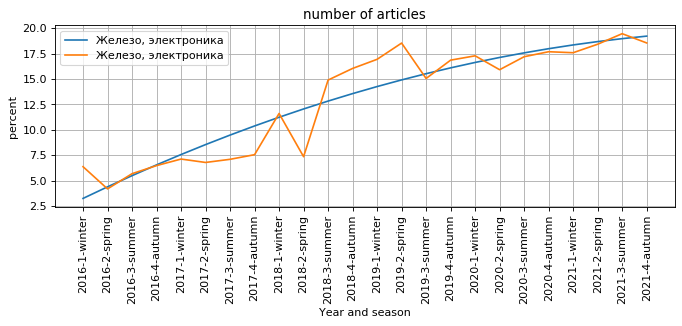

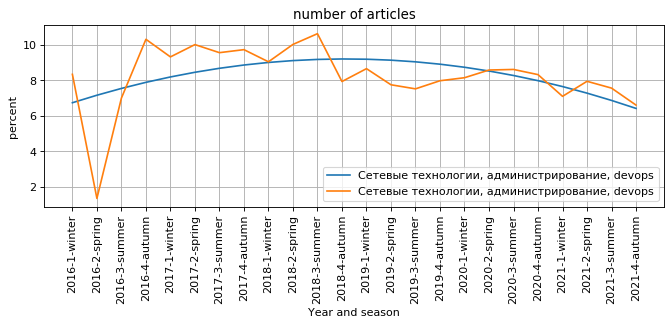

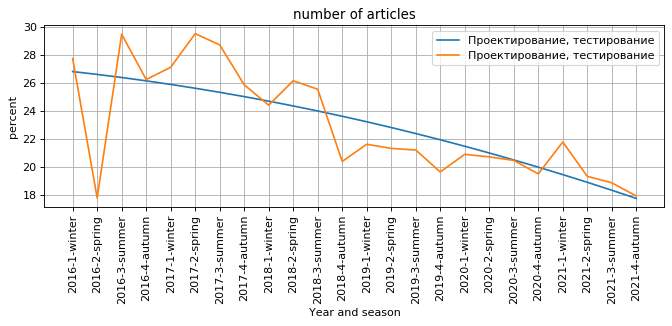

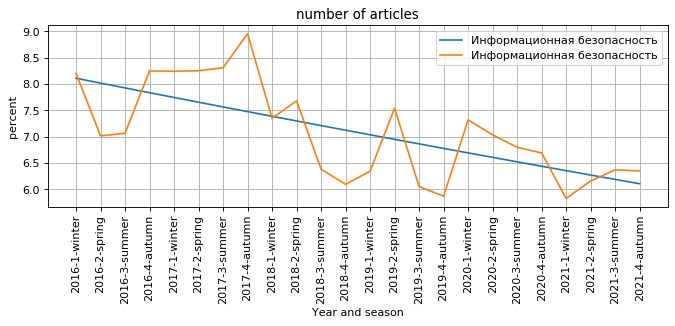

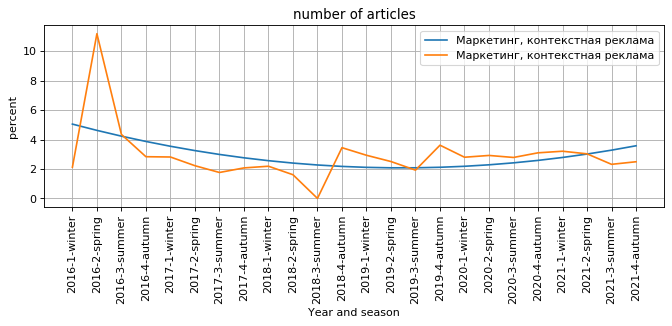

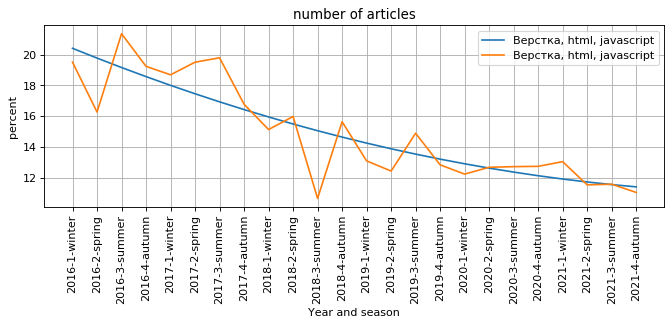

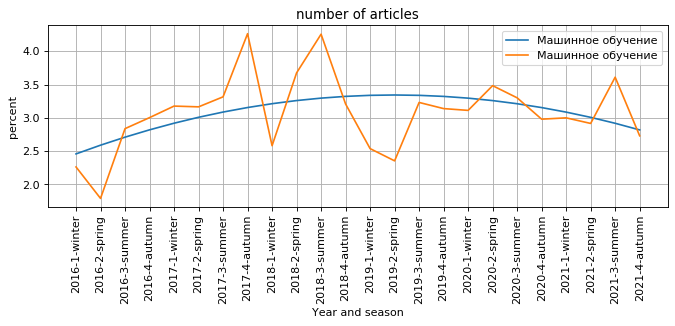

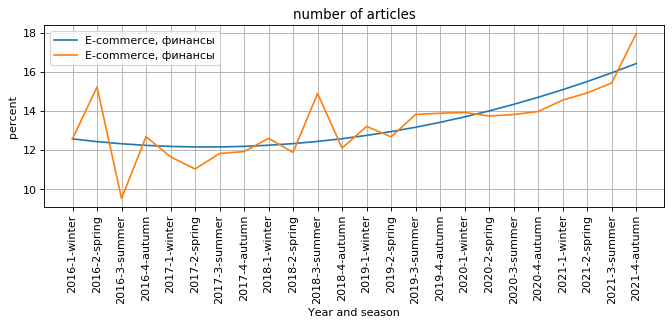

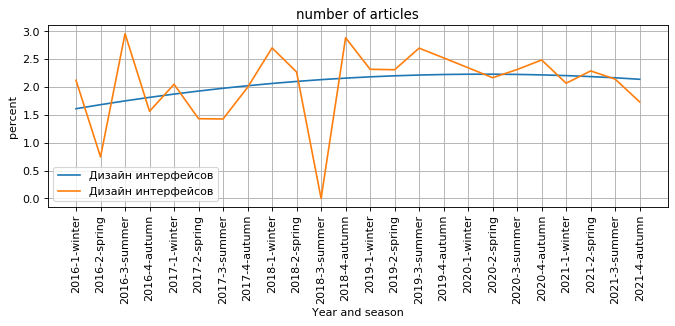

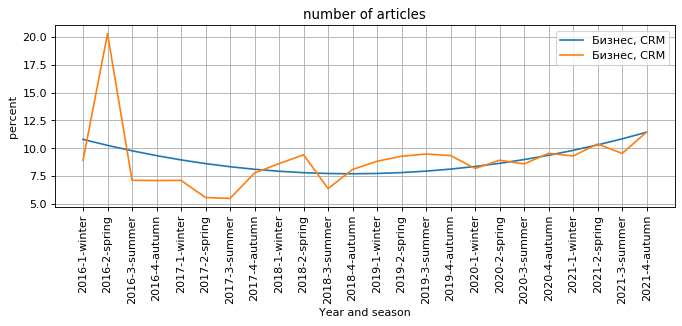

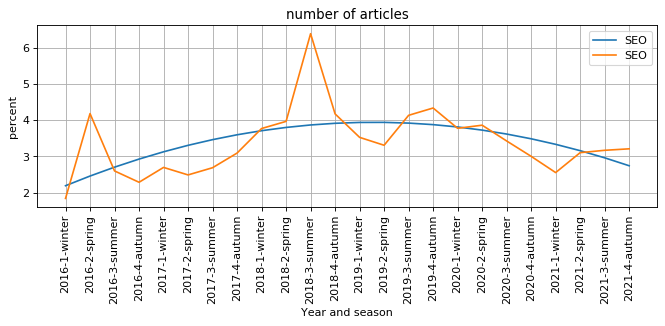

In [9]:
plot_stat(count_df(habr_stat).astype('float64'), 'number of articles')

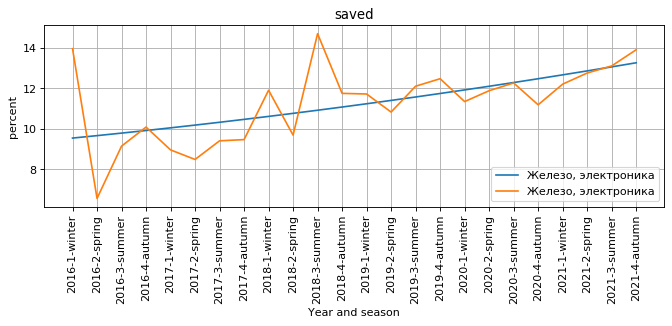

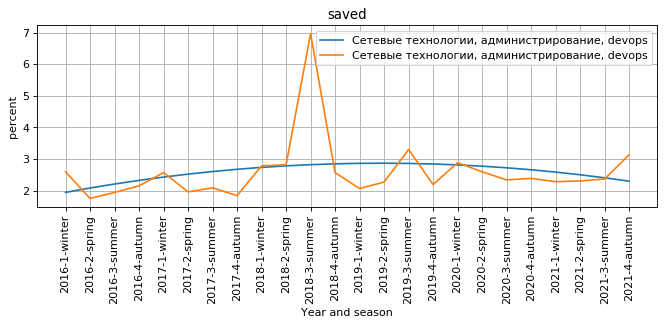

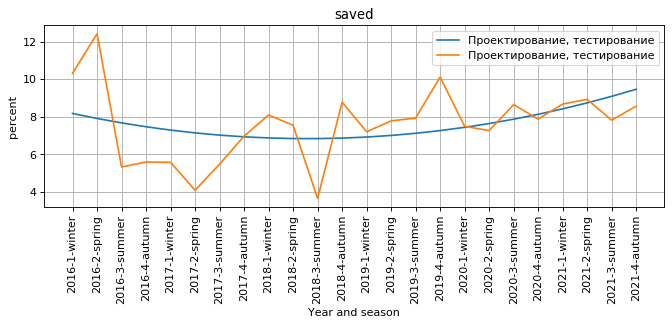

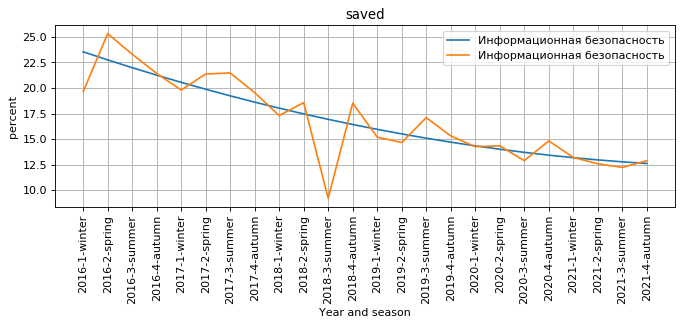

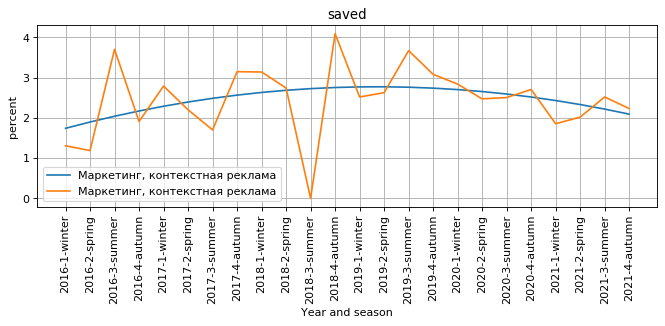

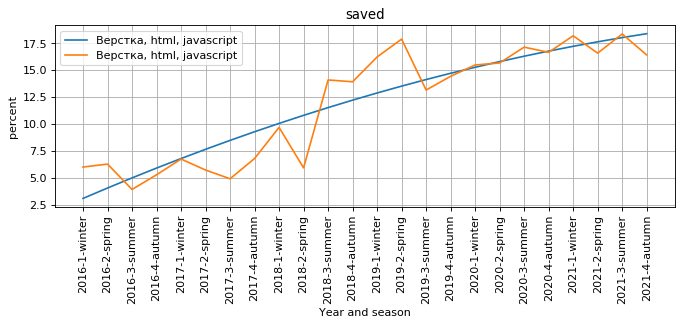

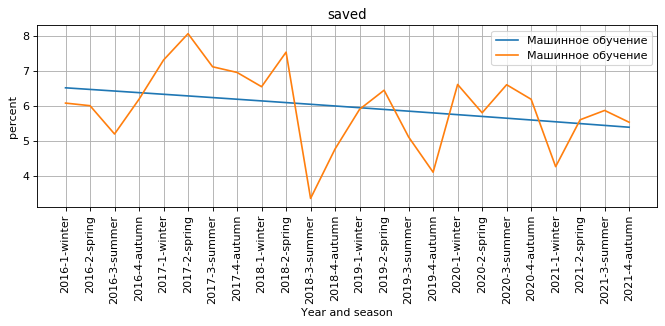

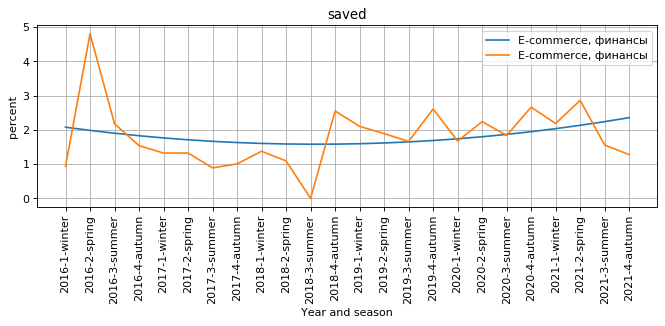

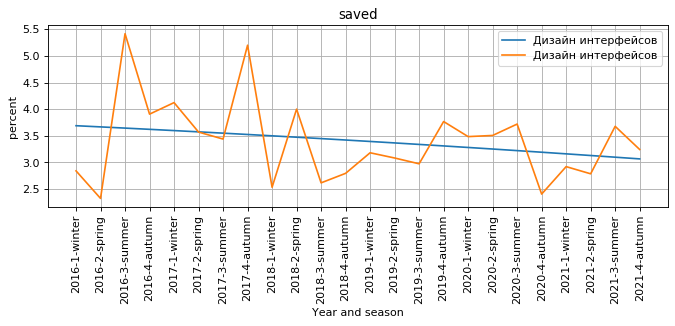

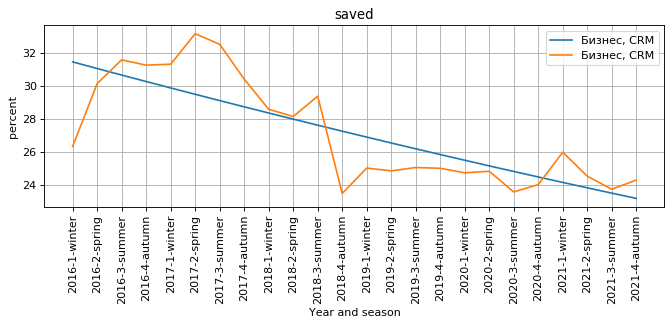

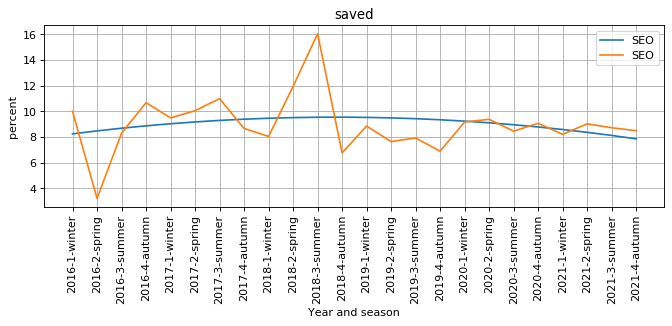

In [10]:
plot_stat(pivot_df(habr_stat, ['field'], ['saved'], ['sum']), 'saved')

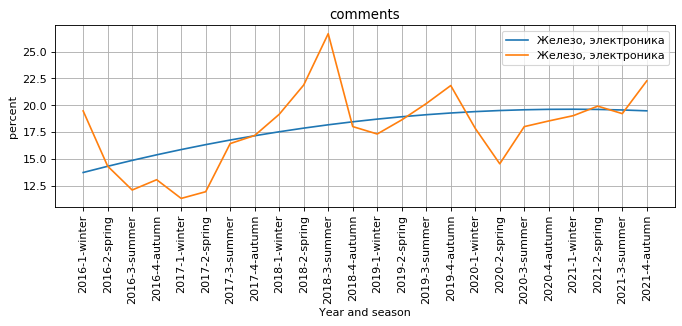

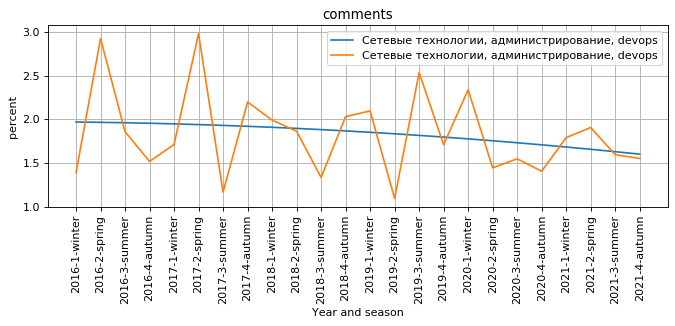

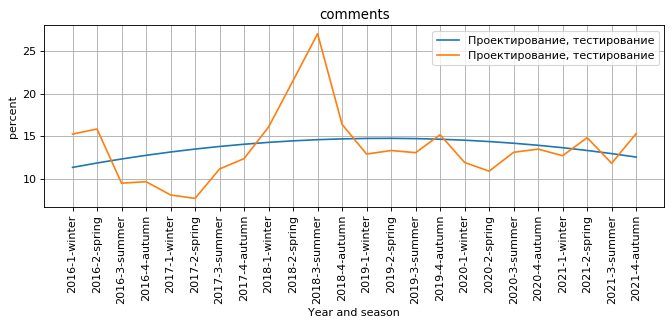

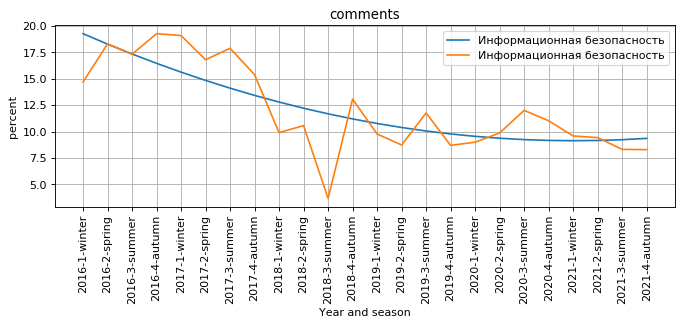

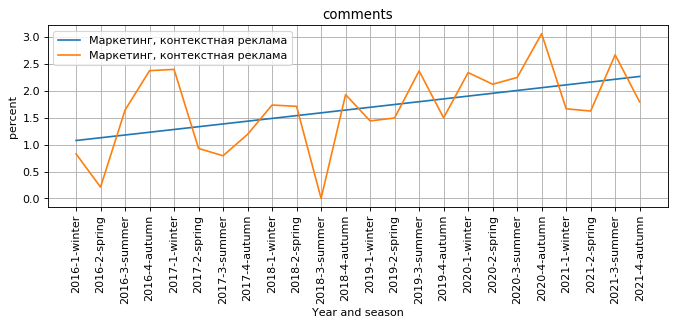

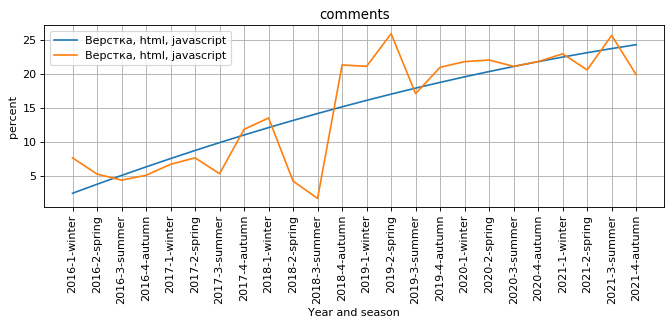

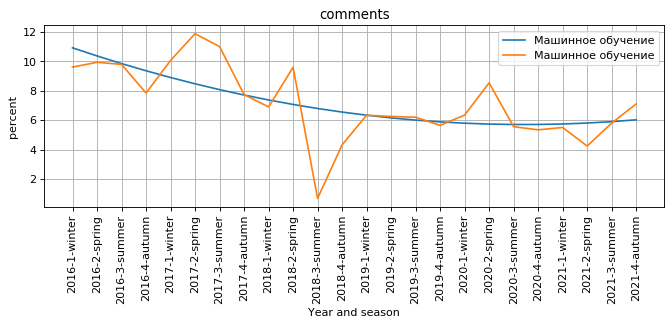

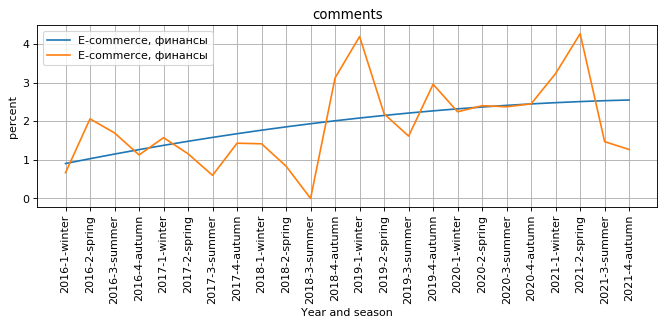

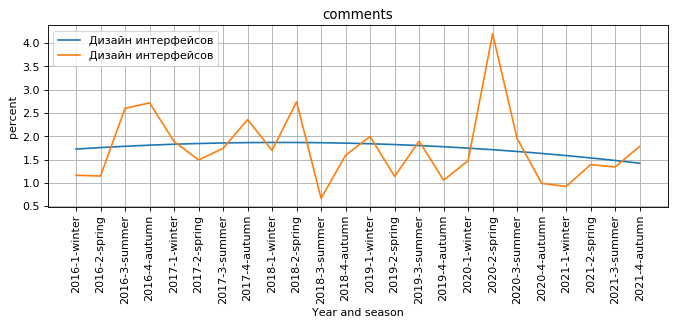

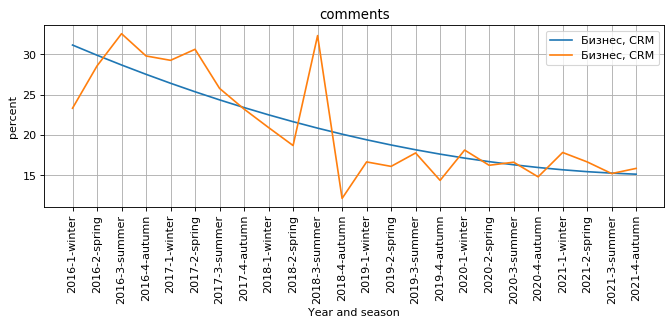

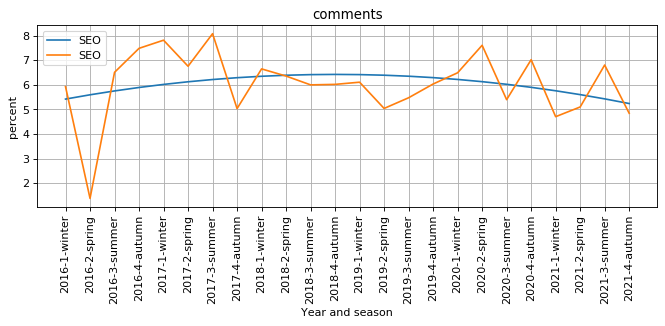

In [11]:
plot_stat(pivot_df(habr_stat, ['field'], ['comments'], ['sum']), 'comments')

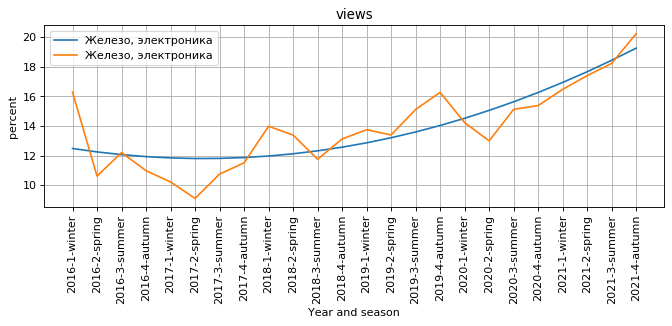

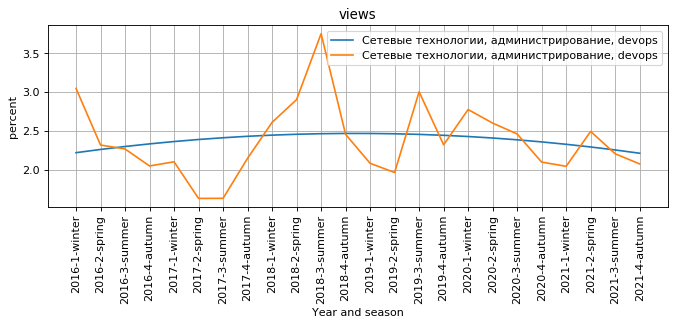

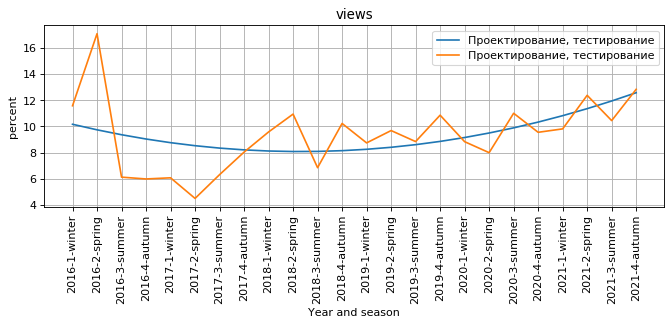

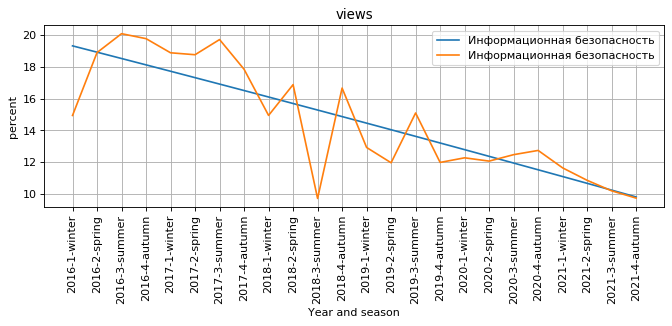

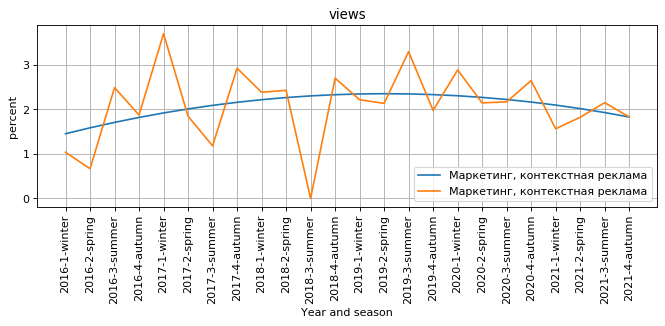

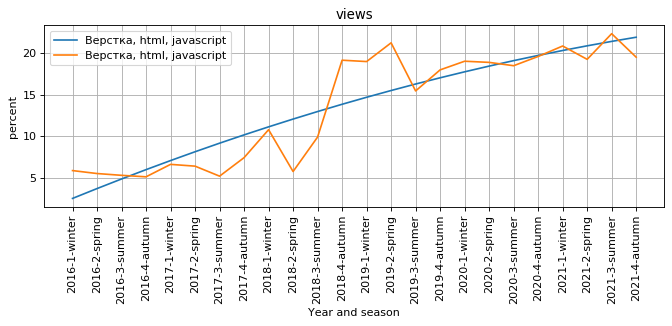

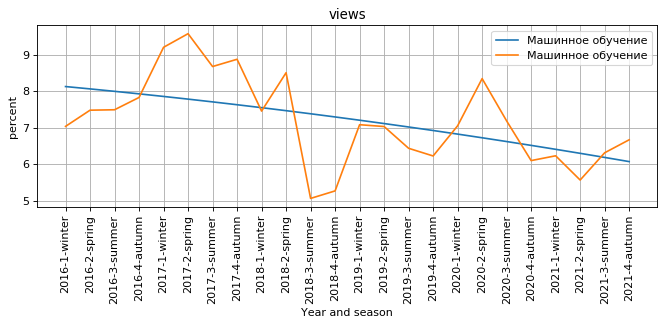

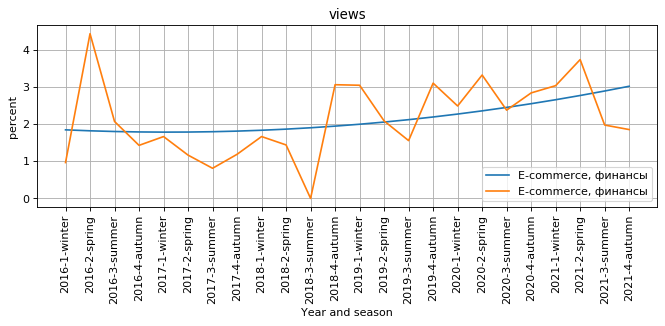

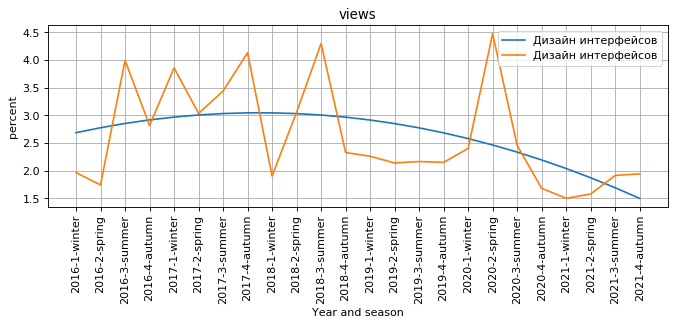

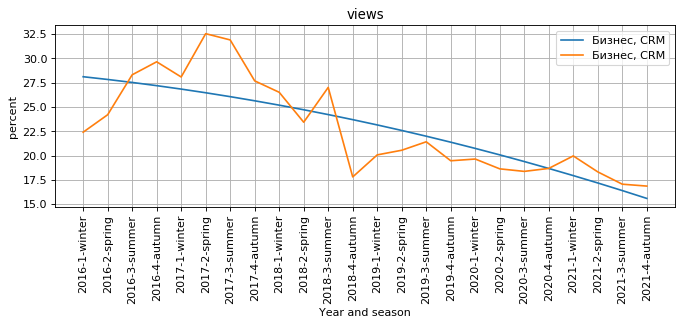

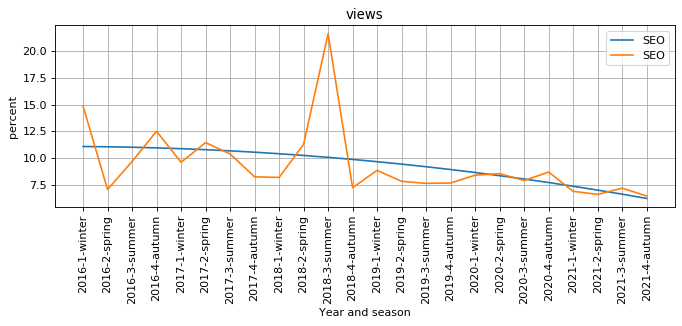

In [12]:
plot_stat(pivot_df(habr_stat, ['field'], ['views'], ['sum']), 'views')